In [1]:
def viralCurve(t, n):
    return float(1)/math.pow(t,n)

In [2]:
import math

In [3]:
viralCurve(2,3)

0.125

In [29]:
def computeNewUsersNoS(initialCohort, generations, n, alpha):
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*viralCurve(t+1, n))
            cohorts.append(sum(newCohort))
        return cohorts
    
#Need to show this step by step graphically in slides

In [ ]:
def computeNewUsers(initialCohort, generations, n, alpha, S):
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*viralCurve(t+1, n)*float((S-sum(cohorts)))/(S))
            cohorts.append(sum(newCohort))
        return cohorts

In [15]:
aa=computeNewUsersNoS(1000,100, 2.1, 0.67)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.1, 0.6)

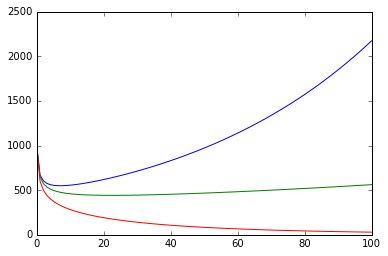

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [30]:
aa=computeNewUsersNoS(1000,100, 1.9, 0.595)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.3, 0.7)

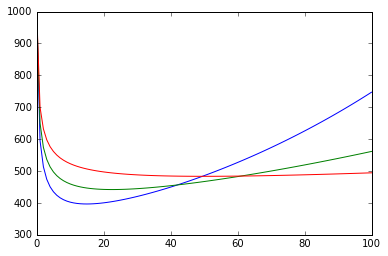

In [31]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [32]:
aa=computeNewUsers(1000,100, 2, 0.7, 2000000)
bb=computeNewUsers(1000,100, 2, 0.74, 1000000)
cc=computeNewUsers(1000,100, 2, 0.8, 500000)

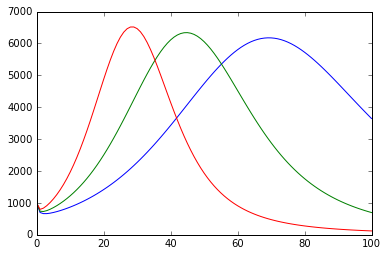

In [33]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [ ]:
sum(a)

In [ ]:
map(lambda x, y: (x+y)/2, a)
clear(sum)

In [ ]:
numbers = [1, 2, 3]
numsum = sum(list(numbers))
print(numsum)

In [ ]:
def sum(L):
    return map(lambda x, y: (x+y)/2, L)

In [ ]:
numbers = [1, 2, 3]
numsum = sum(list(numbers))
print(numsum)

In [ ]:
clear(sum)